In [1]:
import group_data as gd
import flylib
import numpy as np

In [3]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [4]:
trial_numbers = list()
trial_names = list()
fly_numbers = list()
signal_units = list()
signal_data = list()
signal_names = list()
swarm_names = list()

for swarm_name,swarm in gd.ptch_roll_swarms.items():
    for fly in swarm.flies:
        try:
            sigs = fly.get_pkl_data('nnls_fits_no_bk_dF_F_sig_mtrx.cpkl')
            for i,trial in enumerate(sigs['StimCond']):
                for key in ['StimCond','wb_frequency',
                            'Ph1','Ph2','Xpos','Ypos',
                            'b1','b2','b3',
                            'i1','i2',
                            'iii1','iii3','iii24',
                            'hg1','hg2','hg3','hg4',
                            'tpd','tpv','ttm']:
                    try:
                        signal_data.append(np.array(sigs[key][i]))
                        #print np.around(np.mean(trial[trial>0.1]))
                        trial_names.append(sigs['trial_cond'][i])
                        trial_numbers.append(i)
                        fly_numbers.append(fly.fly_num)
                        signal_names.append(key)
                        swarm_names.append(swarm_name)
                    except KeyError:
                        pass
        except IOError:
            print fly.fly_num
            print swarm_name
            print 'missing file'
                #print 'missing: %s'%key
        except EOFError:
            print 'eof error' + str(fly.fly_num)
            
trial_numbers = np.array(trial_numbers)
trial_names = np.array(trial_names)
fly_numbers = np.array(fly_numbers)
signal_units = np.array(signal_units)
signal_data = np.array(signal_data)
signal_names = np.array(signal_names)
swarm_names = np.array(swarm_names)

In [5]:
selection = (trial_names == 'pth_roll_90') & (signal_names == 'b3')

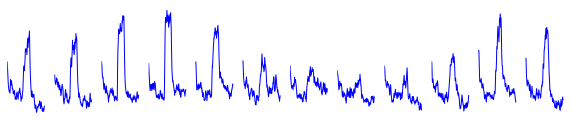

In [6]:
def kill_spines(top = True,right=True,bottom = True,left=True):
    if top:
        gca().spines['top'].set_visible(False)
        [x.set_visible(False) for x in gca().get_xticklabels()]
        [x.set_visible(False) for x in gca().get_xticklines()]
    if bottom:
        gca().spines['bottom'].set_visible(False)
        [x.set_visible(False) for x in gca().get_xticklabels()]
        [x.set_visible(False) for x in gca().get_xticklines()]
    if left:
        gca().spines['left'].set_visible(False)
        [y.set_visible(False) for y in gca().get_yticklabels()]
        [y.set_visible(False) for y in gca().get_yticklines()]
    if right:
        gca().spines['right'].set_visible(False)
        [y.set_visible(False) for y in gca().get_yticklabels()]
        [y.set_visible(False) for y in gca().get_yticklines()]
    
dir_range = [('pth_roll_%s'%p,1+9*i*30.0/360.) for i,p in enumerate(range(0,360,30))]
figure(figsize = (10,2))
xi = np.linspace(0,23,1150)
xrng = xi<17
bsln = (xi>0) & (xi<7)
for i,d in enumerate(dir_range):
    subplot(1,12,i+1,sharey = gca())
    selection = (trial_names == d[0]) & (signal_names == 'hg1')
    dta = signal_data[selection] - np.mean(signal_data[selection][:,bsln])
    plot(xi[xrng],nanmean(dta[:,xrng],axis = 0))
    kill_spines()
#gca().set_xbound(0,20)

('pth_roll_0', 208)
('pth_roll_30', 207)
('pth_roll_60', 208)
('pth_roll_90', 208)
('pth_roll_120', 208)
('pth_roll_150', 208)
('pth_roll_180', 208)
('pth_roll_210', 208)
('pth_roll_240', 208)
('pth_roll_270', 208)
('pth_roll_300', 208)
('pth_roll_330', 207)
('pth_roll_phsrndm', 88)
('pth_roll_multipole', 88)
('pth_roll_0', 208)
('pth_roll_30', 207)
('pth_roll_60', 208)
('pth_roll_90', 208)
('pth_roll_120', 208)
('pth_roll_150', 208)
('pth_roll_180', 208)
('pth_roll_210', 208)
('pth_roll_240', 208)
('pth_roll_270', 208)
('pth_roll_300', 208)
('pth_roll_330', 207)
('pth_roll_phsrndm', 88)
('pth_roll_multipole', 88)
('pth_roll_0', 208)
('pth_roll_30', 207)
('pth_roll_60', 208)
('pth_roll_90', 208)
('pth_roll_120', 208)
('pth_roll_150', 208)
('pth_roll_180', 208)
('pth_roll_210', 208)
('pth_roll_240', 208)
('pth_roll_270', 208)
('pth_roll_300', 208)
('pth_roll_330', 207)
('pth_roll_phsrndm', 88)
('pth_roll_multipole', 88)
('pth_roll_0', 208)
('pth_roll_30', 207)
('pth_roll_60', 208)
('pth

/home/psilentp/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:662: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


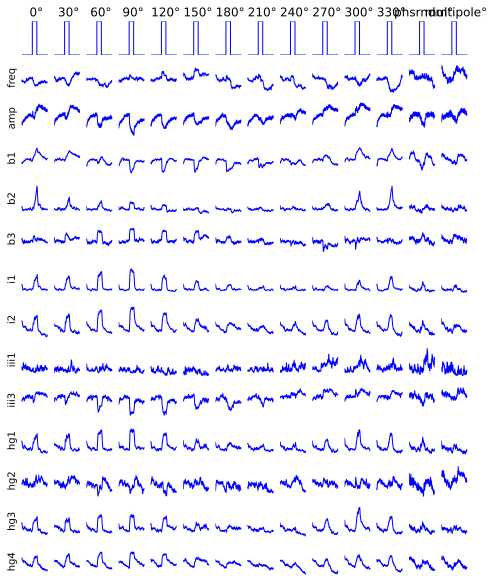

In [7]:
def kill_spines(top = True,right=True,bottom = True,left=True):
    if top:
        gca().spines['top'].set_visible(False)
        [x.set_visible(False) for x in gca().get_xticklabels()]
        [x.set_visible(False) for x in gca().get_xticklines()]
    if bottom:
        gca().spines['bottom'].set_visible(False)
        [x.set_visible(False) for x in gca().get_xticklabels()]
        [x.set_visible(False) for x in gca().get_xticklines()]
    if left:
        gca().spines['left'].set_visible(False)
        [y.set_visible(False) for y in gca().get_yticklabels()]
        [y.set_visible(False) for y in gca().get_yticklines()]
    if right:
        gca().spines['right'].set_visible(False)
        [y.set_visible(False) for y in gca().get_yticklabels()]
        [y.set_visible(False) for y in gca().get_yticklines()]
    
dir_range = [('pth_roll_%s'%p) for i,p in enumerate(range(0,360,30))]
dir_range.append('pth_roll_phsrndm')
dir_range.append('pth_roll_multipole')

figure(figsize = (8,10))
xi = np.linspace(0,23,1150)
xrng = xi<17
bsln = (xi>3) & (xi<7)
sig_list = ['wb_frequency','Ph1','b1','b2','b3','i1','i2','iii1','iii3','hg1','hg2','hg3','hg4']#,'tpd','tpv']
lbl_list = ['freq','amp','b1','b2','b3','i1','i2','iii1','iii3','hg1','hg2','hg3','hg4']#,'tpd','tpv']

import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(len(sig_list)+1, len(dir_range))
for j,d in enumerate(dir_range):
    if j == 0:
        lax = subplot(gs[0,j])
    else:
        subplot(gs[0,j],sharey = lax)
    plot([0,7,7,10,10,17],[0,0,20,20,0,0])
    gca().set_title(str(d.split('_')[-1]) + u'\u00B0')
    kill_spines()
for i,sig_name in enumerate(sig_list):
    #lax = subplot(gs[i,0],sharex = gca())
    for j,d in enumerate(dir_range):
        #subplot(1,12,i+1,sharey = gca())
        if j == 0:
            lax = subplot(gs[i+1,j])
            gca().set_ylabel(lbl_list[i])
        else:
            subplot(gs[i+1,j],sharey = lax)
        #if i == 0:
        #    gca().set_title(str(d[0].split('_')[-1]) + u'\u00B0')
        kill_spines()
        selection = (trial_names == d) & (signal_names == sig_name)
        print (d,np.sum(selection))
        dta = signal_data[selection] - np.nanmedian(signal_data[selection][:,bsln],axis = 1)[:,np.newaxis]
        plot(xi[xrng],nanmean(dta[:,xrng],axis = 0))
savefig('ptch_roll.pdf')
#gca().set_xbound(0,20)

In [22]:
208/8.0

26.0

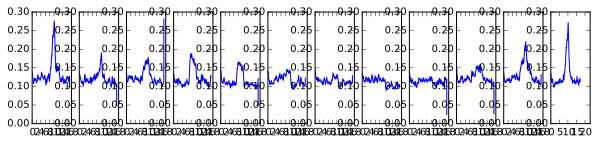

In [136]:
figure(figsize = (10,2))
xi = np.linspace(0,23,1150)
#imshow(signal_data[selection],aspect = 'auto',cmap = cm.gray,extent = [0,23,0,100])
#plot([0,7,7,10,10,20],[0,0,20,20,0,0])
#subplot(2,1,1)
for i,d in enumerate(dir_range):
    subplot(1,12,i+1,sharey = gca())
    selection = (trial_names == d[0]) & (signal_names == 'b2')
    plot(xi,nanmean(signal_data[selection],axis = 0))
gca().set_xbound(0,23)

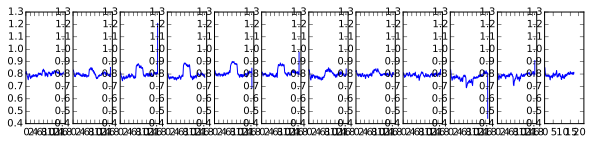

In [137]:
figure(figsize = (10,2))
xi = np.linspace(0,23,1150)
#imshow(signal_data[selection],aspect = 'auto',cmap = cm.gray,extent = [0,23,0,100])
#plot([0,7,7,10,10,20],[0,0,20,20,0,0])
#subplot(2,1,1)
for i,d in enumerate(dir_range):
    subplot(1,12,i+1,sharey = gca())
    selection = (trial_names == d[0]) & (signal_names == 'b3')
    plot(xi,nanmean(signal_data[selection],axis = 0))
gca().set_xbound(0,23)

In [12]:
d[0]

'p'